### Notebook Summary

Resampling methods are designed to change the composition of a training dataset for an imbalanced classification task. A number of under-sampling and re-sampling methods are explored:
1. Near Miss 1
2. Near Miss 2
3. Near Miss 3
4. Random Under-sampling
5. Cluster

### Python Packages

In [1]:
import os
import sys

import pandas as pd
import numpy as np
from collections import Counter

from imblearn.under_sampling import NearMiss, RandomUnderSampler
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Custom Modules

In [2]:
sys.path.append("../Codebase") 
import config as _config

### Parameters and Vaiables

### Load Data

In [3]:
path = os.path.join(_config.DATA_DIR, 'ETL')
filename = 'creditcard.csv'

df_input = pd.read_csv( os.path.join(path, filename))
df_input = df_input.drop_duplicates()

In [4]:
df_input.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df_input_0 = df_input[ df_input['Class']==0 ]
df_input_1 = df_input[ df_input['Class']==1 ]

In [6]:
target = 'Class'
features = df_input.columns.tolist()
features.remove(target)

## Undersampling with NearMiss

### NearMiss
Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

* **NearMiss-1:** Majority class examples with minimum average distance to three closest minority class examples.
* **NearMiss-2:** Majority class examples with minimum average distance to three furthest minority class examples.
* **NearMiss-3:** Majority class examples with minimum distance to each minority class example.

Although all three NearMiss options would be applied, NearMiss-3 seems desirable, as it will only keep those majority class examples that are on the decision boundary. Time vs. feature plots (see EDA_visual_inspection notebook) show that the decision boundary is a narrow region in the variable space.

#### NearMiss Type 1

In [7]:
near_miss_type = 1

X, y = df_input[features].values, df_input[[target]].values

undersample = NearMiss(version=1, n_neighbors=near_miss_type)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 473, 1: 473})


In [8]:
df_X = pd.DataFrame(X, columns=features)
df_y = pd.DataFrame(y, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

df_samp1 = df.copy()

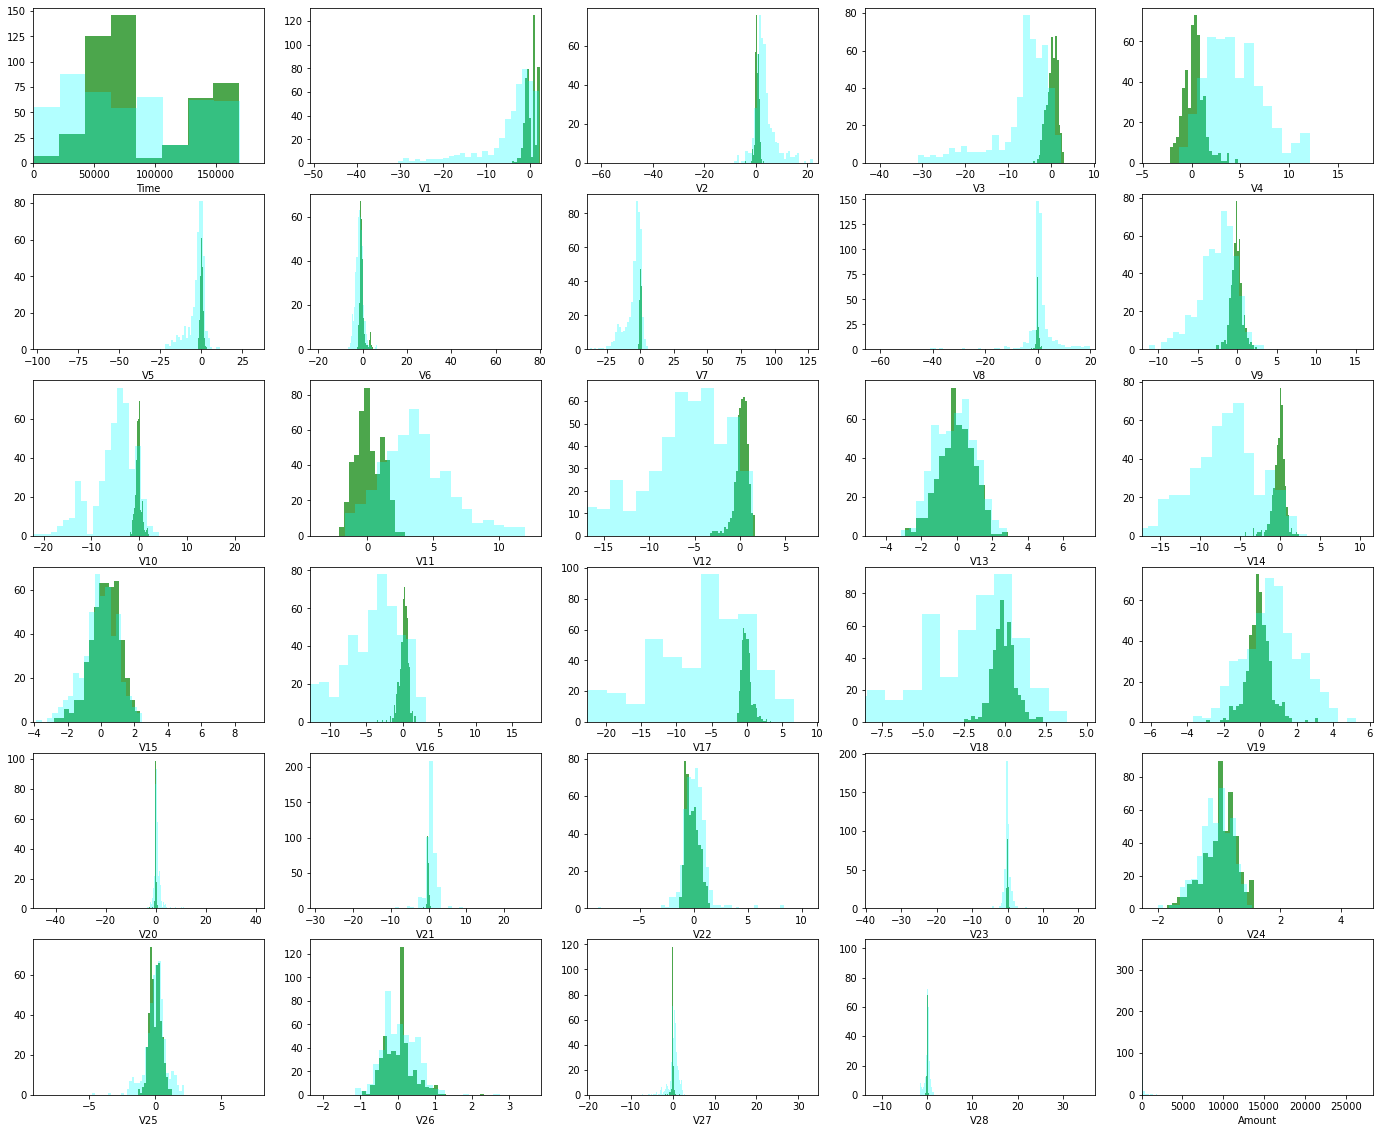

In [9]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.7))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1

#### NearMiss Type 2

In [10]:
near_miss_type = 2

X, y = df_input[features].values, df_input[[target]].values

undersample = NearMiss(version=1, n_neighbors=near_miss_type)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 473, 1: 473})


In [11]:
df_X = pd.DataFrame(X, columns=features)
df_y = pd.DataFrame(y, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

df_samp2 = df.copy()

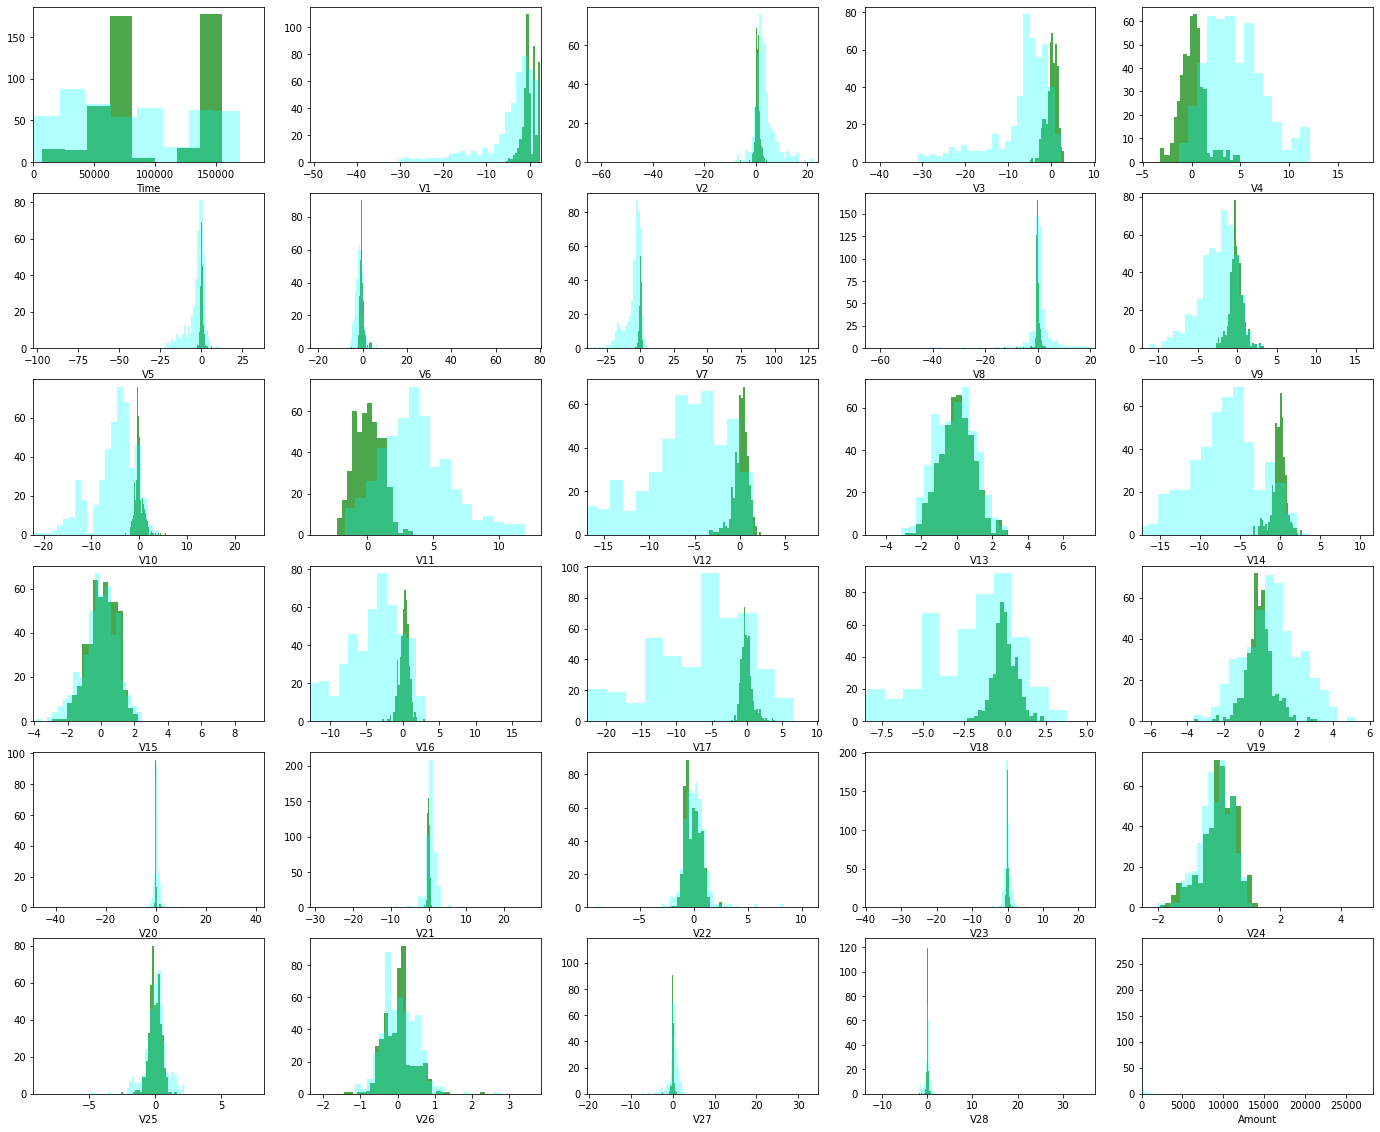

In [12]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.7))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1

#### NearMiss Type 3

In [13]:
near_miss_type = 3

X, y = df_input[features].values, df_input[[target]].values

undersample = NearMiss(version=1, n_neighbors=near_miss_type)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 473, 1: 473})


In [14]:
df_X = pd.DataFrame(X, columns=features)
df_y = pd.DataFrame(y, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

df_samp3 = df.copy()

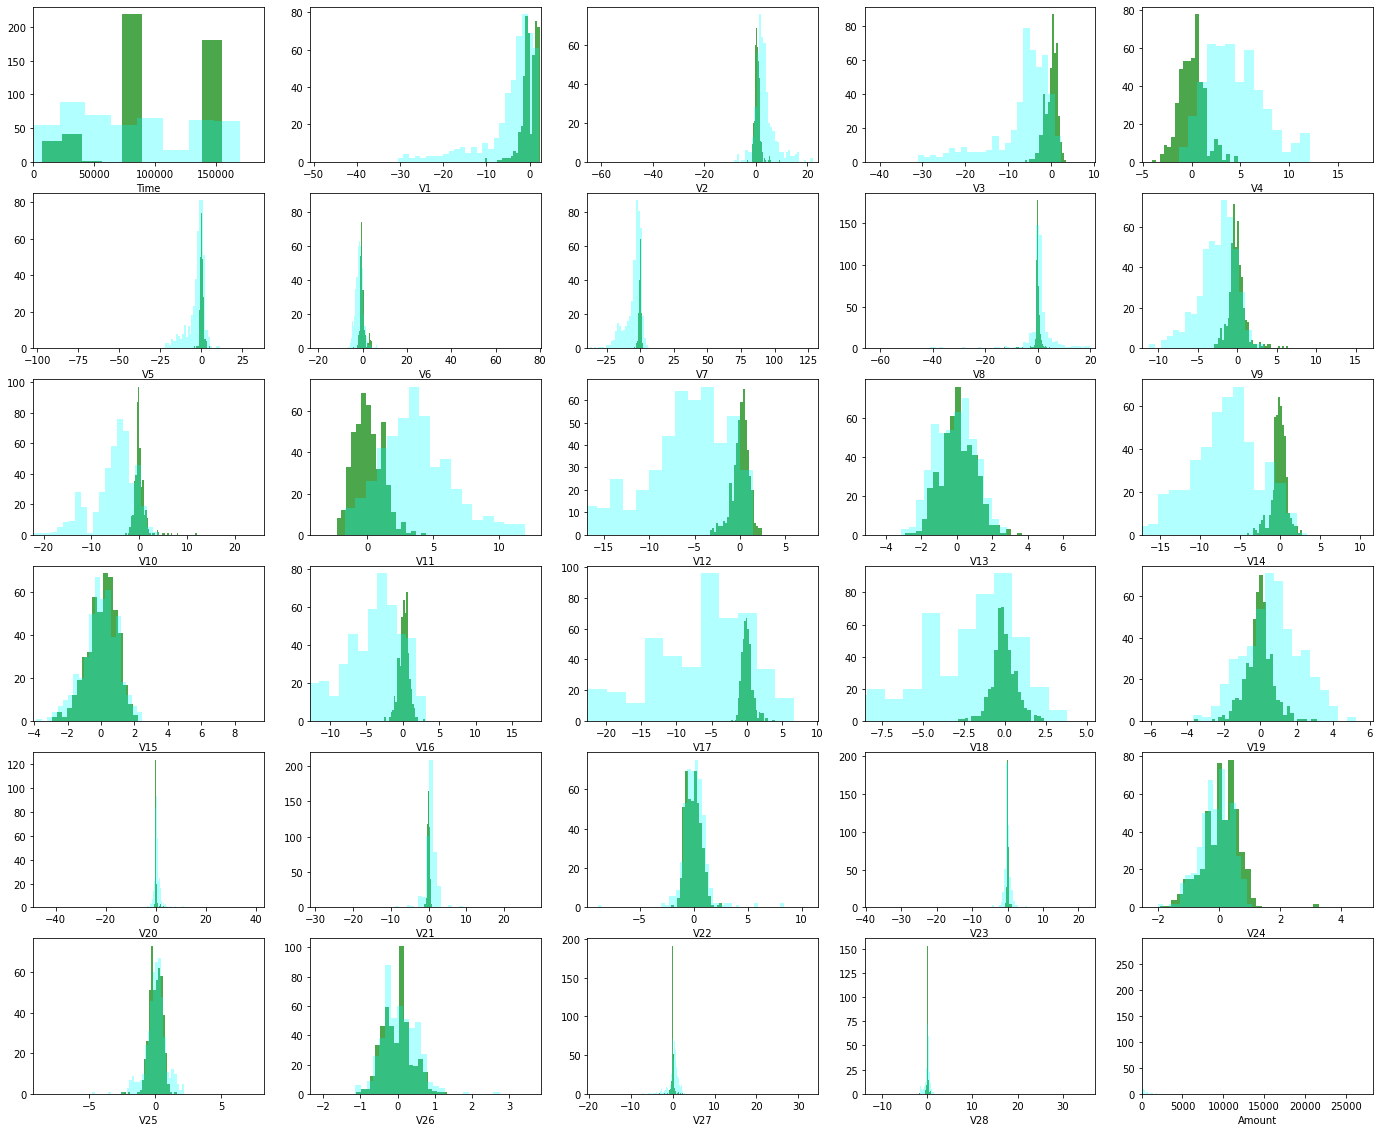

In [15]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.7))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1

### Random Undersampling

In [16]:
X, y = df_input[features].values, df_input[[target]].values

undersamp_rand = RandomUnderSampler(sampling_strategy=0.01)

X_rand, y_rand = undersamp_rand.fit_resample(X, y)

Counter(y_rand), Counter((y.flatten()))

(Counter({0: 47300, 1: 473}), Counter({0: 283253, 1: 473}))

In [17]:
df_X = pd.DataFrame(X_rand, columns=features)
df_y = pd.DataFrame(y_rand, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

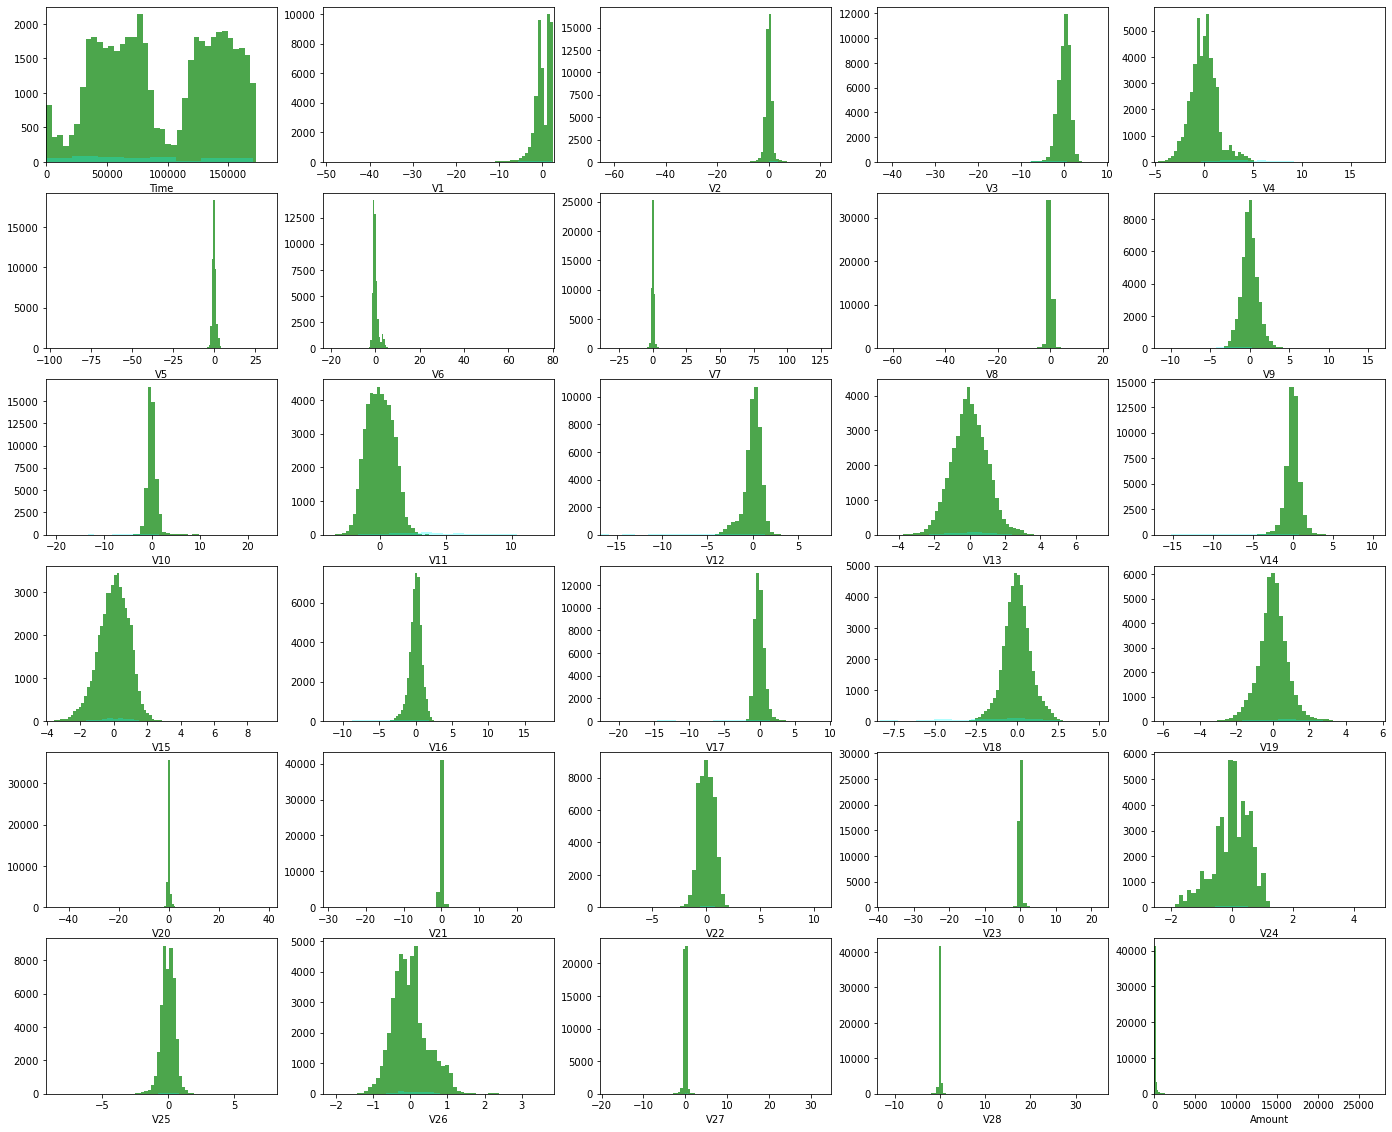

In [18]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.7))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1

### Clustering

#### Kmeans

In [27]:
df_0 = df_input[df_input['Class']==0]
df_1 = df_input[df_input['Class']==1] 

X0, y0 = df_0[features].values, df_0[[target]].values
X1, y1 = df_1[features].values, df_1[[target]].values

In [28]:
def runKmeans(X, k):
    model = KMeans(n_clusters=k, random_state=None)
    cluster_labels = model.fit_predict(X)
#     silhouette = silhouette_score(X, cluster_labels)
    inertia = model.inertia_
    return inertia
    

k_list = range(50, 300, 50)

inertia_0 = []
inertia_1 = []

for k in k_list:
    inertia_0.append(runKmeans(X0, k))
    inertia_1.append(runKmeans(X1, k))


Text(0.5, 1.0, 'Class 1 (fraud)')

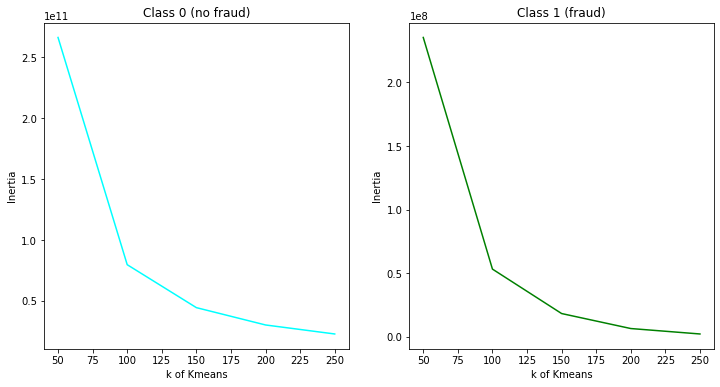

In [29]:
nrow = 1
ncol = 2
fig, ax = plt.subplots(nrow, ncol, figsize=(12, 6))

ax[0].plot(k_list, inertia_0, c='cyan', linestyle='-')
ax[0].set_xlabel("k of Kmeans")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Class 0 (no fraud)")


ax[1].plot(k_list, inertia_1, c='green', linestyle='-')
ax[1].set_xlabel("k of Kmeans")
ax[1].set_ylabel("Inertia")
ax[1].set_title("Class 1 (fraud)")

In [22]:
def runKmeans(X, k):
    model = KMeans(n_clusters=k, random_state=None)
    cluster_labels = model.fit_predict(X)
    clsuter_centers = model.cluster_centers_
    inertia = model.inertia_
    return clsuter_centers, cluster_labels, inertia

In [23]:
cluster_centers, cluster_labels, inertia = runKmeans(X0, 200)

df_X0_clust = pd.DataFrame(cluster_centers, columns=features)
df_y0_clust = pd.DataFrame([0]*cluster_centers.shape[0], columns=['Class'])
df0_clust = pd.concat([df_X0_clust, df_y0_clust], axis=1)

In [24]:
cluster_centers, cluster_labels, inertia = runKmeans(X1, 200)

df_X1_clust = pd.DataFrame(cluster_centers, columns=features)
df_y1_clust = pd.DataFrame([1]*cluster_centers.shape[0], columns=['Class'])
df1_clust = pd.concat([df_X1_clust, df_y1_clust], axis=1)

In [25]:
df_clust = pd.concat([df0_clust, df1_clust], axis=0)

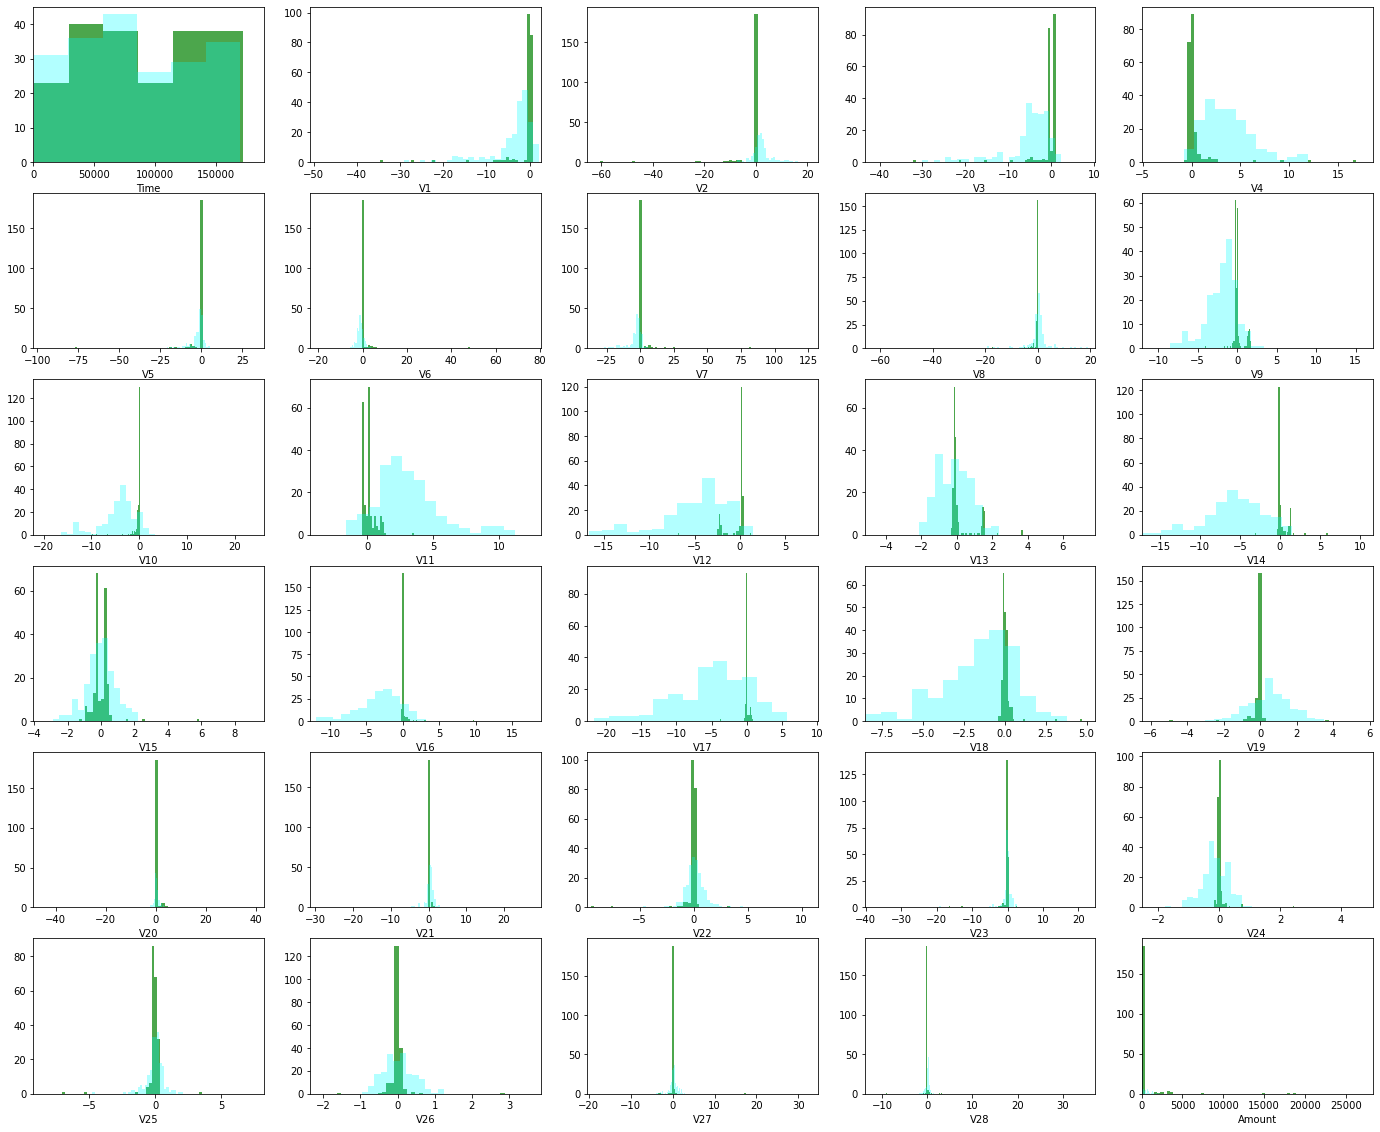

In [26]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_clust[df_clust['Class']==0][feat]
    feat1 = df_clust[df_clust['Class']==1][feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.7))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1